The data is taken from the source https://cmr.fysik.dtu.dk/abx2/abx2.html#database-of-abx2-materials

In [1]:
##Import the modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
import csv
import os
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('descriptor_ABX2.csv')
df1 = df1.round(decimals = 2)
df1.head()

,compound,AM1,AN1,Period1,group1,First_IE1,Second_IE1,elctron_AF1,paulielctrneg1,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,metling1,boiling1,density1,molarVol1,heat_fus1,heat_vap1,thermal_con1,spec_heat1,AM2,AN2,Period2,group2,First_IE21,Second_IE12,elctron_AF2,paulielctrneg2,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,metling2,boiling2,density2,molarVol2,heat_fus2,heat_vap2,thermal_con2,spec_heat2,AM3,AN3,Period3,group3,First_IE3,Second_IE3,elctron_AF3,paulielctrneg3,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,metling3,boiling3,density3,molarVol3,heat_fus3,heat_vap3,thermal_con3,spec_heat3,ST,KT,CP,BandGap,Ksgap,Volume
0,ZnGeN2,65.39,30,4,12,906.4,1733.3,0.0,1.65,1.59,139,122,135,419.53,907,7.13,0.0,7.35,119,1.16,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.99,211,120,125,938.30,2833,5.32,0.0,31.80,334,0.60,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,1,0,0,2.44,1.76,181.39
1,ZnGeN2,65.39,30,4,12,906.4,1733.3,0.0,1.65,1.59,139,122,135,419.53,907,7.13,0.0,7.35,119,1.16,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.99,211,120,125,938.30,2833,5.32,0.0,31.80,334,0.60,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,0,1,0,3.02,2.15,181.83
2,ZnGeN2,65.39,30,4,12,906.4,1733.3,0.0,1.65,1.59,139,122,135,419.53,907,7.13,0.0,7.35,119,1.16,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.99,211,120,125,938.30,2833,5.32,0.0,31.80,334,0.60,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,0,0,1,2.73,1.95,181.56
3,AlGaN2,26.98,13,3,13,577.5,1816.7,-41.8,1.61,1.61,184,121,125,660.30,2470,2.70,0.0,10.70,293,2.37,904,69.72,31,4,13,578.8,1979.3,-40.0,1.81,1.76,187,122,130,29.76,2400,5.91,0.0,5.59,256,0.41,371.0,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,1,0,0,4.59,3.28,178.46
4,AlGaN2,26.98,13,3,13,577.5,1816.7,-41.8,1.61,1.61,184,121,125,660.30,2470,2.70,0.0,10.70,293,2.37,904,69.72,31,4,13,578.8,1979.3,-40.0,1.81,1.76,187,122,130,29.76,2400,5.91,0.0,5.59,256,0.41,371.0,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,0,1,0,4.63,3.31,178.36


In [6]:
df1.keys()

Index(['compound', 'AM1', 'AN1', 'Period1', 'group1', 'First_IE1',
       'Second_IE1', 'elctron_AF1', 'paulielctrneg1  ', 'Allen_electneg1',
       'vand_rad1', 'cov_rad1', 'atom_rad1', 'metling1', 'boiling1',
       'density1', 'molarVol1', 'heat_fus1', 'heat_vap1', 'thermal_con1',
       'spec_heat1', 'AM2', 'AN2', 'Period2', 'group2', 'First_IE21',
       'Second_IE12', 'elctron_AF2', 'paulielctrneg2', 'Allen_electneg2',
       'vand_rad2', 'cov_rad2', 'atom_rad2', 'metling2', 'boiling2',
       'density2', 'molarVol2', 'heat_fus2', 'heat_vap2', 'thermal_con2',
       'spec_heat2', 'AM3', 'AN3', 'Period3', 'group3', 'First_IE3',
       'Second_IE3', 'elctron_AF3', 'paulielctrneg3  ', 'Allen_electneg3',
       'vand_rad3', 'cov_rad3', 'atom_rad3', 'metling3', 'boiling3',
       'density3', 'molarVol3', 'heat_fus3', 'heat_vap3', 'thermal_con3',
       'spec_heat3', 'ST', 'KT', 'CP', 'BandGap', 'Ksgap', 'Volume'],
      dtype='object')

In [7]:
df1[['compound','density1','density2','density3']].head(20)

,compound,density1,density2,density3
0,ZnGeN2,7.13,5.32,0.81
1,ZnGeN2,7.13,5.32,0.81
2,ZnGeN2,7.13,5.32,0.81
3,AlGaN2,2.70,5.91,0.81
4,AlGaN2,2.70,5.91,0.81
5,AlGaN2,2.70,5.91,0.81
6,ZnSiN2,7.13,2.33,0.81
7,ZnSiN2,7.13,2.33,0.81
8,ZnSiN2,7.13,2.33,0.81
9,AlGaAs2,2.70,5.91,5.73


## Outlier in dataset

In [9]:
df1.shape

(99, 67)

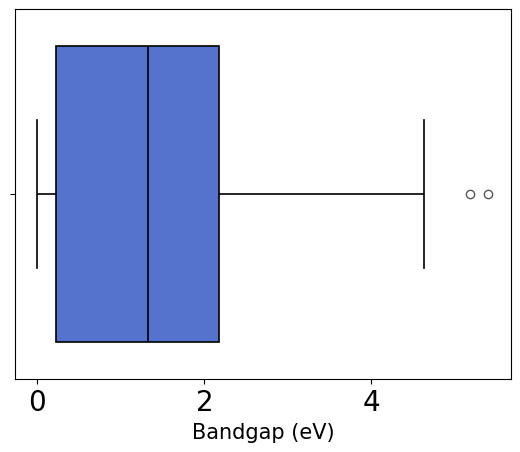

<Figure size 3200x2000 with 0 Axes>

In [11]:
#plt.style.use('seaborn-dark')
#plt.figure(figsize=(8,5),dpi=400)
b2 = sns.boxplot(x=df1['BandGap'], color="royalblue",
    boxprops=dict(edgecolor="black", linewidth=1.2),  # Darker box edges
    medianprops=dict(color="black", linewidth=1.2),  # Darker median line
    whiskerprops=dict(color="black", linewidth=1.2),  # Darker whiskers
    capprops=dict(color="black", linewidth=1.2)  # Darker caps
                 )
plt.figure(figsize=(8,5),dpi=400)
b2.set_xlabel("Bandgap (eV)",fontsize=15)
#b2.set_ylabel("Density",fontsize=20,fontweight ='bold')
b2.tick_params(labelsize=20)
b2.figure.savefig("bandgap_box.pdf",bbox_inches='tight')
plt.show()
#files.download("bandgap_box.pdf")

## Remove Outlier

In [12]:
df2 = df1.copy()
df2 = df2[df2['BandGap'].between(0, 5)]
df2.head(2)

,compound,AM1,AN1,Period1,group1,First_IE1,Second_IE1,elctron_AF1,paulielctrneg1,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,metling1,boiling1,density1,molarVol1,heat_fus1,heat_vap1,thermal_con1,spec_heat1,AM2,AN2,Period2,group2,First_IE21,Second_IE12,elctron_AF2,paulielctrneg2,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,metling2,boiling2,density2,molarVol2,heat_fus2,heat_vap2,thermal_con2,spec_heat2,AM3,AN3,Period3,group3,First_IE3,Second_IE3,elctron_AF3,paulielctrneg3,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,metling3,boiling3,density3,molarVol3,heat_fus3,heat_vap3,thermal_con3,spec_heat3,ST,KT,CP,BandGap,Ksgap,Volume
0,ZnGeN2,65.39,30,4,12,906.4,1733.3,0.0,1.65,1.59,139,122,135,419.53,907,7.13,0.0,7.35,119,1.16,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.99,211,120,125,938.3,2833,5.32,0.0,31.8,334,0.6,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,1,0,0,2.44,1.76,181.39
1,ZnGeN2,65.39,30,4,12,906.4,1733.3,0.0,1.65,1.59,139,122,135,419.53,907,7.13,0.0,7.35,119,1.16,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.99,211,120,125,938.3,2833,5.32,0.0,31.8,334,0.6,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.07,155,71,65,-210.1,-195.8,0.81,0.01,0.36,2.79,0.0,1040.0,0,1,0,3.02,2.15,181.83


In [13]:
df2.shape

(97, 67)

In [14]:
from scipy.stats import skew,kurtosis
print("skew : ",skew(df2['BandGap']))
print("kurt : ",kurtosis(df2['BandGap']))


skew :  0.7375920445987384
kurt :  0.0680066649897828


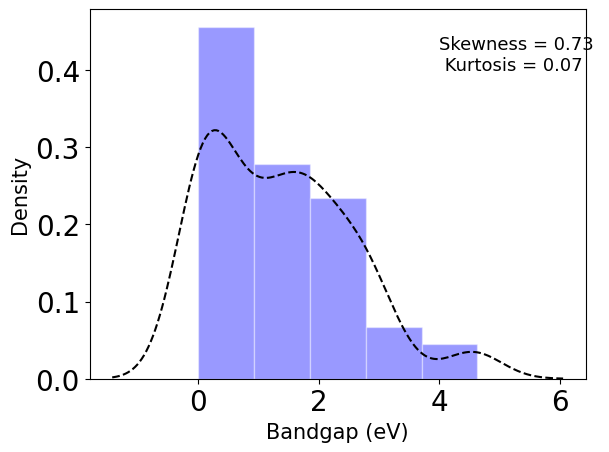

In [15]:
#plt.figure(figsize=(8,5),dpi=400)
b1= sns.distplot(df2['BandGap'],color='blue',bins =5, hist_kws=dict(edgecolor="white", linewidth=1)
            	,kde_kws={"linestyle":"--","color":"k"})
b1.set_xlabel("Bandgap (eV)",fontsize=15)
b1.set_ylabel("Density",fontsize=15)
b1.text(4, 0.4, 'Skewness = 0.73 \n Kurtosis = 0.07',fontsize=13)
b1.tick_params(labelsize=20)
#b1.set_xticks(np.arange(-1, 6,1))
# b1.figure.savefig('BandGap_Skew_Kurt.pdf',bbox_inches='tight')
# files.download("BandGap_Skew_Kurt.pdf")
plt.show()


# Volume plot

In [19]:
df3 = df1[['compound', 'BandGap', 'Volume', 'ST', 'KT', 'CP']]
df3 = df3.round(decimals=2)
df3.head(10)

,compound,BandGap,Volume,ST,KT,CP
0,ZnGeN2,2.44,181.39,1,0,0
1,ZnGeN2,3.02,181.83,0,1,0
2,ZnGeN2,2.73,181.56,0,0,1
3,AlGaN2,4.59,178.46,1,0,0
4,AlGaN2,4.63,178.36,0,1,0
5,AlGaN2,4.46,178.51,0,0,1
6,ZnSiN2,4.52,164.13,1,0,0
7,ZnSiN2,5.40,164.62,0,1,0
8,ZnSiN2,5.18,163.89,0,0,1
9,AlGaAs2,1.76,367.95,1,0,0


In [20]:
import pandas as pd
import re

# Function to extract the last element from the compound string
def extract_family(compound):
    elements = re.findall(r'[A-Z][a-z]?', compound)
    return elements[-1] if elements else None

# Apply the function to create a new 'Family' column
df3['Family'] = df3['compound'].apply(extract_family)

# Show result
print(df3.head(10))

    compound  BandGap  Volume  ST  KT  CP Family
0   ZnGeN2       2.44  181.39   1   0   0      N
1   ZnGeN2       3.02  181.83   0   1   0      N
2   ZnGeN2       2.73  181.56   0   0   1      N
3   AlGaN2       4.59  178.46   1   0   0      N
4   AlGaN2       4.63  178.36   0   1   0      N
5   AlGaN2       4.46  178.51   0   0   1      N
6   ZnSiN2       4.52  164.13   1   0   0      N
7   ZnSiN2       5.40  164.62   0   1   0      N
8   ZnSiN2       5.18  163.89   0   0   1      N
9  AlGaAs2       1.76  367.95   1   0   0     As


In [21]:
# First, create a 'Phase' column
def get_phase(row):
    if row['ST'] == 1:
        return 'ST'
    elif row['KT'] == 1:
        return 'KT'
    elif row['CP'] == 1:
        return 'CP'
    else:
        return 'Unknown'  # fallback if none is 1

df3['Phase'] = df3.apply(get_phase, axis=1)
# Show result
print(df3.head(10))

    compound  BandGap  Volume  ST  KT  CP Family Phase
0   ZnGeN2       2.44  181.39   1   0   0      N    ST
1   ZnGeN2       3.02  181.83   0   1   0      N    KT
2   ZnGeN2       2.73  181.56   0   0   1      N    CP
3   AlGaN2       4.59  178.46   1   0   0      N    ST
4   AlGaN2       4.63  178.36   0   1   0      N    KT
5   AlGaN2       4.46  178.51   0   0   1      N    CP
6   ZnSiN2       4.52  164.13   1   0   0      N    ST
7   ZnSiN2       5.40  164.62   0   1   0      N    KT
8   ZnSiN2       5.18  163.89   0   0   1      N    CP
9  AlGaAs2       1.76  367.95   1   0   0     As    ST


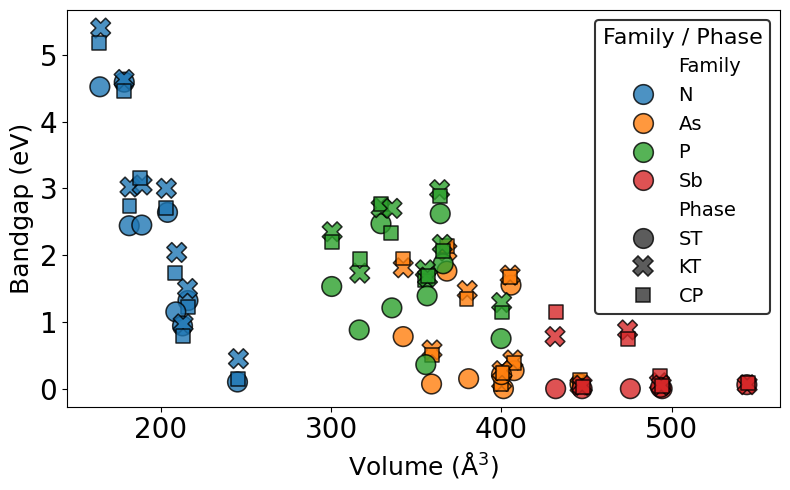

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 5))
#plt.figure(figsize=(8.5, 6),dpi=300)
sns.scatterplot(
    data=df3,
    y='BandGap',
    x='Volume',
    hue='Family',       # Color by Family
    style='Phase',      # Marker shape by Phase
    palette='tab10',
    s=200,
    edgecolor='black',
    alpha=0.8
)

# Set axis labels with bold and LaTeX
plt.xlabel("Volume ($\\mathrm{\\AA^3}$)",  fontsize=18)
plt.ylabel("Bandgap (eV)", fontsize=18)
plt.tick_params(labelsize=20)
# Adjust legends
legend = plt.legend(title="Family / Phase", fontsize=14, title_fontsize=16, loc='best')
plt.setp(legend.get_frame(), edgecolor='black', linewidth=1.5)
plt.tight_layout()
#plt.savefig ('Family_plot.pdf')
plt.show()


## Make pearson corelation

In [26]:
df3 =df2.copy()
df3 = df2[['compound','Allen_electneg1','vand_rad1', 'cov_rad1', 'atom_rad1','density1',\
          'Allen_electneg2','vand_rad2', 'cov_rad2', 'atom_rad2','density2',\
        'Allen_electneg3','vand_rad3', 'cov_rad3', 'atom_rad3','density3',\
          'ST', 'KT', 'CP', 'BandGap',  'Volume']]
df3.head()

,compound,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,density1,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,density2,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,density3,ST,KT,CP,BandGap,Volume
0,ZnGeN2,1.59,139,122,135,7.13,1.99,211,120,125,5.32,3.07,155,71,65,0.81,1,0,0,2.44,181.39
1,ZnGeN2,1.59,139,122,135,7.13,1.99,211,120,125,5.32,3.07,155,71,65,0.81,0,1,0,3.02,181.83
2,ZnGeN2,1.59,139,122,135,7.13,1.99,211,120,125,5.32,3.07,155,71,65,0.81,0,0,1,2.73,181.56
3,AlGaN2,1.61,184,121,125,2.70,1.76,187,122,130,5.91,3.07,155,71,65,0.81,1,0,0,4.59,178.46
4,AlGaN2,1.61,184,121,125,2.70,1.76,187,122,130,5.91,3.07,155,71,65,0.81,0,1,0,4.63,178.36


## Try to make average property

In [27]:
df3['Allen_electneg_Avg'] =(df3['Allen_electneg1']+df3['Allen_electneg2']+df3['Allen_electneg3'])/3
df3['vand_rad_Avg'] =(df3['vand_rad1']+df3['vand_rad2']+df3['vand_rad3'])/3
df3['cov_rad_Avg'] =(df3['cov_rad1']+df3['cov_rad2']+df3['cov_rad3'])/3
df3['atom_rad_Avg'] =(df3['atom_rad1']+df3['atom_rad2']+df3['atom_rad3'])/3
df3['density_Avg'] =(df3['density1']+df3['density2']+df3['density3'])/3
df3= df3.round(decimals = 2)
df3.sample(5)

,compound,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,density1,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,density2,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,density3,ST,KT,CP,BandGap,Volume,Allen_electneg_Avg,vand_rad_Avg,cov_rad_Avg,atom_rad_Avg,density_Avg
44,CdSiAs2,1.52,158,144,155,8.65,1.92,210,111,110,2.33,2.21,185,119,115,5.73,0,0,1,1.34,379.43,1.88,184.33,124.67,126.67,5.57
76,ZnSiP2,1.59,139,122,135,7.13,1.92,210,111,110,2.33,2.25,180,107,100,1.82,0,1,0,2.35,300.56,1.92,176.33,113.33,115.00,3.76
21,CdSiN2,1.52,158,144,155,8.65,1.92,210,111,110,2.33,3.07,155,71,65,0.81,1,0,0,2.45,188.76,2.17,174.33,108.67,110.00,3.93
3,AlGaN2,1.61,184,121,125,2.70,1.76,187,122,130,5.91,3.07,155,71,65,0.81,1,0,0,4.59,178.46,2.15,175.33,104.67,106.67,3.14
55,ZnSiAs2,1.59,139,122,135,7.13,1.92,210,111,110,2.33,2.21,185,119,115,5.73,0,1,0,1.81,342.30,1.91,178.00,117.33,120.00,5.06


In [28]:
df_check_Allen_electneg=  df3[['Allen_electneg1','Allen_electneg2','Allen_electneg3','Allen_electneg_Avg']]
df_check_Allen_electneg.head(3)

,Allen_electneg1,Allen_electneg2,Allen_electneg3,Allen_electneg_Avg
0,1.59,1.99,3.07,2.22
1,1.59,1.99,3.07,2.22
2,1.59,1.99,3.07,2.22


In [29]:
(1.59+1.99+3.07)/3

2.216666666666667

In [30]:
df_check_vand_rad=  df3[['vand_rad1','vand_rad2','vand_rad3','vand_rad_Avg']]
df_check_vand_rad.head(3)

,vand_rad1,vand_rad2,vand_rad3,vand_rad_Avg
0,139,211,155,168.33
1,139,211,155,168.33
2,139,211,155,168.33


In [31]:
(139+211+155)/3

168.33333333333334

## ` Try to find max and min of the property`

In [32]:
df4 = df3.copy()

In [33]:
import pandas as pd
df4 = df3.copy()

# List of property names (without the number suffix)
properties = ['Allen_electneg', 'vand_rad', 'cov_rad', 'atom_rad', 'density']

# Loop through each property and find the max and min across corresponding columns
for prop in properties:
    # Create a list of the column names for this property (e.g., ['Allen_electneg1', 'Allen_electneg2', 'Allen_electneg3'])
    cols = [f'{prop}1', f'{prop}2', f'{prop}3']

    # Find the row-wise max and min for this property and create new columns
    df4[f'{prop}_Max'] = df4[cols].max(axis=1)
    df4[f'{prop}_Min'] = df4[cols].min(axis=1)

# Display the DataFrame with new columns
df4.head()

,compound,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,density1,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,density2,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,density3,ST,KT,CP,BandGap,Volume,Allen_electneg_Avg,vand_rad_Avg,cov_rad_Avg,atom_rad_Avg,density_Avg,Allen_electneg_Max,Allen_electneg_Min,vand_rad_Max,vand_rad_Min,cov_rad_Max,cov_rad_Min,atom_rad_Max,atom_rad_Min,density_Max,density_Min
0,ZnGeN2,1.59,139,122,135,7.13,1.99,211,120,125,5.32,3.07,155,71,65,0.81,1,0,0,2.44,181.39,2.22,168.33,104.33,108.33,4.42,3.07,1.59,211,139,122,71,135,65,7.13,0.81
1,ZnGeN2,1.59,139,122,135,7.13,1.99,211,120,125,5.32,3.07,155,71,65,0.81,0,1,0,3.02,181.83,2.22,168.33,104.33,108.33,4.42,3.07,1.59,211,139,122,71,135,65,7.13,0.81
2,ZnGeN2,1.59,139,122,135,7.13,1.99,211,120,125,5.32,3.07,155,71,65,0.81,0,0,1,2.73,181.56,2.22,168.33,104.33,108.33,4.42,3.07,1.59,211,139,122,71,135,65,7.13,0.81
3,AlGaN2,1.61,184,121,125,2.70,1.76,187,122,130,5.91,3.07,155,71,65,0.81,1,0,0,4.59,178.46,2.15,175.33,104.67,106.67,3.14,3.07,1.61,187,155,122,71,130,65,5.91,0.81
4,AlGaN2,1.61,184,121,125,2.70,1.76,187,122,130,5.91,3.07,155,71,65,0.81,0,1,0,4.63,178.36,2.15,175.33,104.67,106.67,3.14,3.07,1.61,187,155,122,71,130,65,5.91,0.81


In [34]:
df_check_vand_rad=  df4[['vand_rad1','vand_rad2','vand_rad3','vand_rad_Avg','vand_rad_Max','vand_rad_Min']]
df_check_vand_rad.head(3)

,vand_rad1,vand_rad2,vand_rad3,vand_rad_Avg,vand_rad_Max,vand_rad_Min
0,139,211,155,168.33,211,139
1,139,211,155,168.33,211,139
2,139,211,155,168.33,211,139


## `Final Dataset`

In [35]:
df4.keys()

Index(['compound', 'Allen_electneg1', 'vand_rad1', 'cov_rad1', 'atom_rad1',
       'density1', 'Allen_electneg2', 'vand_rad2', 'cov_rad2', 'atom_rad2',
       'density2', 'Allen_electneg3', 'vand_rad3', 'cov_rad3', 'atom_rad3',
       'density3', 'ST', 'KT', 'CP', 'BandGap', 'Volume', 'Allen_electneg_Avg',
       'vand_rad_Avg', 'cov_rad_Avg', 'atom_rad_Avg', 'density_Avg',
       'Allen_electneg_Max', 'Allen_electneg_Min', 'vand_rad_Max',
       'vand_rad_Min', 'cov_rad_Max', 'cov_rad_Min', 'atom_rad_Max',
       'atom_rad_Min', 'density_Max', 'density_Min'],
      dtype='object')

In [36]:
df5 = df4[['compound','BandGap','Volume','ST', 'KT', 'CP', 'Allen_electneg_Avg',
       'vand_rad_Avg', 'cov_rad_Avg', 'atom_rad_Avg', 'density_Avg',
       'Allen_electneg_Max', 'Allen_electneg_Min', 'vand_rad_Max',
       'vand_rad_Min', 'cov_rad_Max', 'cov_rad_Min', 'atom_rad_Max',
       'atom_rad_Min', 'density_Max', 'density_Min']]
df5.head()

,compound,BandGap,Volume,ST,KT,CP,Allen_electneg_Avg,vand_rad_Avg,cov_rad_Avg,atom_rad_Avg,density_Avg,Allen_electneg_Max,Allen_electneg_Min,vand_rad_Max,vand_rad_Min,cov_rad_Max,cov_rad_Min,atom_rad_Max,atom_rad_Min,density_Max,density_Min
0,ZnGeN2,2.44,181.39,1,0,0,2.22,168.33,104.33,108.33,4.42,3.07,1.59,211,139,122,71,135,65,7.13,0.81
1,ZnGeN2,3.02,181.83,0,1,0,2.22,168.33,104.33,108.33,4.42,3.07,1.59,211,139,122,71,135,65,7.13,0.81
2,ZnGeN2,2.73,181.56,0,0,1,2.22,168.33,104.33,108.33,4.42,3.07,1.59,211,139,122,71,135,65,7.13,0.81
3,AlGaN2,4.59,178.46,1,0,0,2.15,175.33,104.67,106.67,3.14,3.07,1.61,187,155,122,71,130,65,5.91,0.81
4,AlGaN2,4.63,178.36,0,1,0,2.15,175.33,104.67,106.67,3.14,3.07,1.61,187,155,122,71,130,65,5.91,0.81


In [37]:
df5.shape

(97, 21)

## `Grouping Unit Togather`


In [38]:
df5=df5[['compound', 'BandGap', 'Volume', 'ST', 'KT', 'CP', 'Allen_electneg_Avg','Allen_electneg_Min','Allen_electneg_Max',\
        'vand_rad_Avg','vand_rad_Min','vand_rad_Max','cov_rad_Avg','cov_rad_Min','cov_rad_Max',\
        'atom_rad_Avg','atom_rad_Min','atom_rad_Max','density_Avg','density_Min','density_Max']]
df5.shape

(97, 21)

## `Remove All Zero Bangap`

In [39]:
df6= df5[df5['BandGap'] != 0]
df6.head()

,compound,BandGap,Volume,ST,KT,CP,Allen_electneg_Avg,Allen_electneg_Min,Allen_electneg_Max,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,2.44,181.39,1,0,0,2.22,1.59,3.07,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,3.02,181.83,0,1,0,2.22,1.59,3.07,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
2,ZnGeN2,2.73,181.56,0,0,1,2.22,1.59,3.07,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
3,AlGaN2,4.59,178.46,1,0,0,2.15,1.61,3.07,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91
4,AlGaN2,4.63,178.36,0,1,0,2.15,1.61,3.07,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91


In [40]:
df6.shape

(92, 21)

# `I do not want to Allen_electneg and Phase as input feature`

In [41]:
df7= df6.drop(['Allen_electneg_Avg','Allen_electneg_Min','Allen_electneg_Max','ST','KT','CP'], axis=1)
df7.head()

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
2,ZnGeN2,2.73,181.56,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
3,AlGaN2,4.59,178.46,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91
4,AlGaN2,4.63,178.36,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91


## Try to show person corealtion

In [42]:
df8 = df7.drop(['compound'], axis=1)


In [43]:
corrmat = df8.corr()
#print(corrmat["Spin-polarization"].sort_values(ascending=False).to_string())
print(corrmat['BandGap'].nlargest(20))

BandGap         1.000000
vand_rad_Min    0.162573
atom_rad_Max   -0.351493
cov_rad_Max    -0.409128
density_Max    -0.437305
vand_rad_Avg   -0.464032
cov_rad_Min    -0.536342
vand_rad_Max   -0.552002
atom_rad_Min   -0.576868
Volume         -0.651097
density_Min    -0.683200
cov_rad_Avg    -0.710092
atom_rad_Avg   -0.741464
density_Avg    -0.884194
Name: BandGap, dtype: float64
